# Predict survival using logistic regression with sex, age, and title

#### Author: Basil Chatha (basil.chatha8@gmail.com)

#### Achievement: Using the sex, age and title of passengers, we fit a ridge logistic regression model that predicts if a passenger will survive with about 78.2% accurancy, improving by 16.7% over the 61.5% accuracy of the majority classifier.

## Introduction

In this notebook, we will go over some typical steps of a data science pipeline in order to predict if a passenger survives the Titanic accident:
* Data loading
* Data cleaning
* Feature Engineering
* Predictions
    * Majority classifier (benchmark)
    * Ridge logistic regression

In [1]:
%load_ext watermark
%watermark

2020-06-16T00:45:13-05:00

CPython 3.6.10
IPython 7.15.0

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [12]:
# Import libraries
# ----------------

# System
import sys

# Logging
import logging
logging.basicConfig(format='%(message)s', level=logging.INFO, stream=sys.stdout)

# Pandas
import pandas as pd

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from ..titanic import data, models

ValueError: attempted relative import beyond top-level package

## Dataset

In this section, we load the `titanic.csv` dataset

In [4]:
raw_data_file = "./data/titanic.csv"
df = pd.read_csv(raw_data_file, usecols=['Name', 'Sex', 'Age', 'Survived'])
print('DataFrame shape: {}'.format(df.shape))
df.head()

DataFrame shape: (891, 4)


,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


## Data Cleaning

The percent of missing values in the whole dataset in each column is:

In [5]:
pd.DataFrame(
    df.isnull().sum() / len(df),
    columns=['% Missing Values']
).transpose()

,Survived,Name,Sex,Age
% Missing Values,0.0,0.0,0.0,0.198653


About a fifth of the passenger ages is missing. We may substitute the missing values with the age mean or median. To understand which one to choose, let us have a look at the histogram of the passenger age,

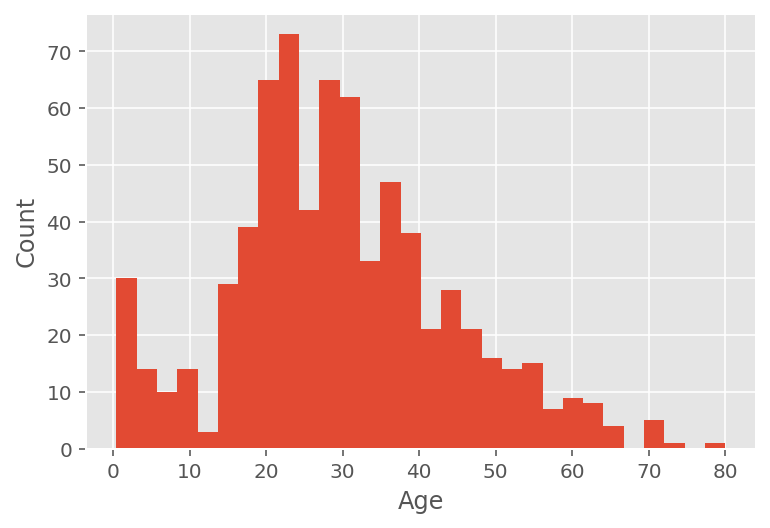

In [6]:
# Age histogram
df.Age.hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Because the age has a tail for higher values, we choose the median to replace missing values, as the median is more robust than the mean against extreme values.

In [7]:
df = df.fillna({'Age': df.Age.median(), })
df.head()

,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


Now that we don't have any missing values, we can assign a variable type to each column.

In [8]:
df = df.astype({
    'Age': 'float64',
    'Name': 'object',
    'Sex': 'category',
    'Survived': 'int64',
})

## Feature Engineering

The passenger names contain titles which we can use to make predictions under the assumption that more wealthy people we have been given precedence to the emergency boats. However, some of the 18 titles in the data are redundant and can be reduced to 6.

In [2]:
df = data.extract_title(df)
df.head()

NameError: name 'data' is not defined

## Predictions

Having completed the data preprocessing, we prepare the data to run models.

In [3]:
X_train, X_test, y_train, y_test = models.data_preparation(df, test_size=0.2, random_state=0)

NameError: name 'models' is not defined

First, we start by defining a simple benchmark over which we can improve with a more elaborate model. For the benchmark, we use the majority vote classifier.

In [11]:
# Mjority vote classifier
majority_vote = round(y_train.mean())
y_test_predictions = [majority_vote] * len(y_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_predictions)
print('The prediction accuracy with the majority vote classifier is {:.1f}%'.format(accuracy * 100))

The prediction accuracy with the majority vote classifier is 61.5%


Next, we use a ridge logistic regression.

In [12]:
# Ridge logistic regression

lr = LogisticRegression(random_state=0, solver='lbfgs')

param_range = [2 ** x for x in range(-10, 10)]

gs = GridSearchCV(
    estimator=lr,
    param_grid={'C': param_range},
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

gs.fit(X_train, y_train)

accuracy = accuracy_score(y_true=y_test, y_pred=gs.predict(X_test))

print('The prediction accuracy with the ridge logistic regression classifier is {:.1f}%'.format(accuracy * 100))

The prediction accuracy with the ridge logistic regression classifier is 78.2%


/opt/anaconda3/envs/titanic_datascience/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In conclusion, using the sex, age and title of passengers, we fitted a ridge logistic regression model that, for our particular train-test split, predicts if a passenger will survive with about 78.2% accurancy, improving by 16.7% over the 61.5% accuracy of the majority classifier.

In this notebook we went through a basic data science pipeline, where we loaded the data, cleaned it, engineered a feature and made predictions using logistic regression.